In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Introduction

In this seminar assignment, we will explore the data and build machine-learning models that predict the biodegradability of chemicals.

[Data set](https://www.openml.org/search?type=data&status=active&id=1494&sort=runs) containing values for 
**41 attributes** (`molecular descriptors`) used to classify 1055 chemicals into **2 classes** (`ready` and `not ready` biodegradable).

## Attribute information

41 molecular descriptors (features) and 1 experimental class:

| Feature Name | Feature Information (Molecular Descriptor) | Type | Distinct values / Missing attributes |
| --- | --- | --- | --- |
| Class (target) | ready biodegradable (RB) and not ready biodegradable (NRB) | nominal | 2/0 |
| V1  | SpMax_L: Leading eigenvalue from Laplace matrix | numeric | 440/0 |
| V2  | J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity | numeric | 1022/0 |
| V3  | nHM: Number of heavy atoms | numeric | 11/0 |
| V4  | F01\[N-N\]: Frequency of N-N at topological distance 1 | numeric | 4/0 |
| V5  | F04\[C-N\]: Frequency of C-N at topological distance 4 | numeric | 16/0 |
| V6  | NssssC: Number of atoms of type ssssC | numeric | 13/0 |
| V7  | nCb-: Number of substituted benzene C(sp2) | numeric | 15/0 |
| V8  | C%: Percentage of C atoms | numeric | 188/0 |
| V9  | nCp: Number of terminal primary C(sp3) | numeric | 15/0 |
| V10 | nO: Number of oxygen atoms | numeric | 12/0 |
| V11 | F03\[C-N\]: Frequency of C-N at topological distance 3 | numeric | 21/0 |
| V12 | SdssC: Sum of dssC E-states | numeric | 384/0 |
| V13 | HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass | numeric | 756/0 |
| V14 | LOC: Lopping centric index | numeric | 373/0 |
| V15 | SM6_L: Spectral moment of order 6 from Laplace matrix | numeric | 510/0 |
| V16 | F03\[C-O\]: Frequency of C - O at topological distance 3 | numeric | 24/0 |
| V17 | Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom) | numeric | 167/0 |
| V18 | Mi: Mean first ionization potential (scaled on Carbon atom) | numeric | 125/0 |
| V19 | nN-N: Number of N hydrazines | numeric | 3/0 |
| V20 | nArNO2: Number of nitro groups (aromatic) | numeric | 4/0 |
| V21 | nCRX3: Number of CRX3 | numeric | 4/0 |
| V22 | SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability | numeric | 352/0 |
| V23 | nCIR: Number of circuits | numeric | 13/0 |
| V24 | B01\[C-Br\]: Presence/absence of C - Br at topological distance 1 | numeric | 2/0 |
| V25 | B03\[C-Cl\]: Presence/absence of C - Cl at topological distance 3 | numeric | 2/0 |
| V26 | N-073: Ar2NH / Ar3N / Ar2N- |  numeric   | 4/0    |
| V27 | SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index) | numeric | 329/0 |
| V28 | Psi\_i\_1d: Intrinsic state pseudoconnectivity index - type 1d | numeric | 205/0 |
| V29 | B04\[C-Br\]: Presence/absence of C - Br at topological distance 4 | numeric | 2/0 |
| V30 | SdO: Sum of dO E-states | numeric | 470/0 |
| V31 | TI2_L: Second Mohar index from Laplace matrix | numeric | 553/0 |
| V32 | nCrt: Number of ring tertiary C(sp3) | numeric | 8/0 |
| V33 | C-026: R--CX--R | numeric | 11/0 |
| V34 | F02\[C-N\]: Frequency of C - N at topological distance 2 | numeric | 16/0 |
| V35 | nHDon: Number of donor atoms for H-bonds (N and O) | numeric | 8/0 |
| V36 | SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass | numeric | 705/0 |
| V37 | Psi\_i\_A: Intrinsic state pseudoconnectivity index - type S average |  numeric   | 624/0    |
| V38 | nN: Number of Nitrogen atoms | numeric | 8/0 |
| V39 | SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass | numeric | 862/0 |
| V40 | nArCOOR: Number of esters (aromatic) | numeric | 5/0 |
| V41 | nX: Number of halogen atoms | numeric | 17/0 |

## 1. Data Preprocessing

### 1.1 Importing the dataset

In [3]:
# Inspect the dataset. How balanced is the target variable (degradability)?
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

X_train = dataset_train.iloc[:, :-1].values
y_train = dataset_train.iloc[:, -1].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, -1].values

### 1.2 Checking for missing values

In [4]:
num_missing = np.sum(np.isnan(X_train))
print(f"Number of missing values in X: {num_missing}")
num_missing = np.sum(np.isnan(y_train))
print(f"Number of missing values in y: {num_missing}")

# Check if there are any missing values present in the dataset
# If there are, print the index of the sample
total_missing = 0
missing_indices = []
for i in range(len(X_train)):
    if np.isnan(X_train[i]).any():
        missing_indices.append(i)
        # Also check if line contains more than one missing value
        if len(np.where(np.isnan(X_train[i]))[0]) > 1:
            print("Sample {} has more than one missing value".format(i))
        total_missing += 1
print("Total number of samples with missing values: {}".format(total_missing))

# Check how balanced is the target variable
print("Number of samples in class 1: {}".format(np.sum(y_train == 1)))
print("Number of samples in class 2: {}".format(np.sum(y_train == 2)))
print("Indices of samples with missing values: {}".format(sorted(missing_indices)))

Number of missing values in X: 82
Number of missing values in y: 0
Sample 689 has more than one missing value
Total number of samples with missing values: 81
Number of samples in class 1: 564
Number of samples in class 2: 282
Indices of samples with missing values: [10, 13, 32, 42, 55, 60, 64, 66, 68, 69, 73, 78, 87, 89, 98, 104, 130, 131, 146, 152, 158, 171, 179, 188, 189, 223, 242, 246, 260, 268, 292, 302, 313, 326, 338, 360, 361, 373, 375, 390, 403, 410, 411, 431, 432, 439, 470, 498, 509, 511, 528, 544, 546, 556, 573, 577, 585, 589, 593, 595, 602, 612, 617, 648, 649, 665, 676, 678, 680, 689, 706, 719, 748, 752, 764, 766, 767, 791, 806, 809, 839]


### 1.3. Taking care of the missing data

In [5]:
# Replace missing values with the mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

### 1.4. Encoding dependent variable ([1,2] -> [0,1])

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

### 1.5. Feature Scaling

Use `standardization`: $X = \frac{X - \mu}{\sigma}$

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1.6. Visualizing the data

## 2. Modeling

In [47]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

In [48]:
def cross_validate(X, y, model, folds=5):
    scores_list = []
    X = X.copy()
    y = y.copy()
    
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = model.predict(X_test)
        scores = {
            'Accuracy': model.score(X_test, y_test),
            'F1': f1_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, y_pred)
        }
        
        
        scores_list.append(scores)
    return scores_list

In [57]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    # Predict the labels
    y_pred = model.predict(X_test)
    y_pred_pos = model.predict_proba(X_test)
    print("Prediction class: {}".format(y_pred_pos))
    y_pred_pos = y_pred_pos[:, 1]
    print("Prediction positive class: {}".format(y_pred_pos))
    metrics = [
        'accuracy',
        'f1',
        'precision',
        'recall',
        'roc_auc'
    ]
    
    scores = []
    for metric in metrics:
        score = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        scores.append(score)
         
    # Calculate roc auc score
    
    roc_a = roc_auc_score(y_test, y_pred_pos)
    print("ROC AUC score: {}".format(roc_a))
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred_pos)
    print("FPR: {}".format(fpr))
    print("TPR: {}".format(tpr))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_a)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
    # Instead of writing own fucntion we can usee sklearn.metrics fun  cross_val_score
    # scoresh = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    # scores2 = cross_validate(X_train, y_train, model)

    scores_10 = []
    for metric in metrics:
        score = cross_val_score(model, X_train, y_train, cv=10, scoring=metric)
        scores_10.append(score)
    
    print("Training accuracy: {}, Test accuracy: {} ".format(model.score(X_train, y_train), model_score))
    
    scores = np.array(scores)
    scores_10 = np.array(scores_10)
    # scores2 = np.array(scores2)
    # print(f"score: \n{scores}\n")
    print(f"score_10: \n{scores_10}\n")
    # print(f"scores manual: \n{scores2}")
    return scores, scores_10
    

Prediction class: [[2.09791694e-01 7.90208306e-01]
 [1.08900451e-01 8.91099549e-01]
 [2.98503772e-03 9.97014962e-01]
 [2.24994830e-01 7.75005170e-01]
 [6.97581215e-01 3.02418785e-01]
 [6.30912379e-01 3.69087621e-01]
 [5.84382404e-02 9.41561760e-01]
 [4.65239955e-03 9.95347600e-01]
 [3.57327523e-02 9.64267248e-01]
 [7.26923913e-02 9.27307609e-01]
 [3.95642430e-02 9.60435757e-01]
 [2.12194004e-02 9.78780600e-01]
 [4.74941440e-02 9.52505856e-01]
 [7.03836757e-02 9.29616324e-01]
 [1.13358776e-01 8.86641224e-01]
 [6.14903311e-02 9.38509669e-01]
 [1.30789032e-01 8.69210968e-01]
 [6.78907257e-02 9.32109274e-01]
 [8.21255933e-01 1.78744067e-01]
 [1.67017093e-01 8.32982907e-01]
 [3.57747678e-01 6.42252322e-01]
 [8.89278991e-01 1.10721009e-01]
 [4.00926431e-01 5.99073569e-01]
 [1.35041211e-01 8.64958789e-01]
 [9.98655601e-01 1.34439938e-03]
 [1.29801562e-02 9.87019844e-01]
 [1.42204197e-01 8.57795803e-01]
 [7.60013471e-02 9.23998653e-01]
 [1.22787074e-01 8.77212926e-01]
 [1.71220166e-01 8.287798

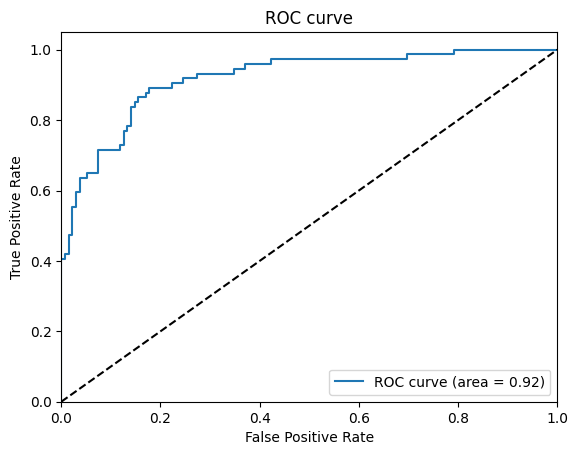

Training accuracy: 0.8900709219858156, Test accuracy: 0.8277511961722488 
score_10: 
[[0.88235294 0.89411765 0.82352941 0.92941176 0.82352941 0.88235294
  0.78571429 0.85714286 0.91666667 0.8452381 ]
 [0.82758621 0.83636364 0.69387755 0.89285714 0.74576271 0.82758621
  0.70967742 0.77777778 0.87719298 0.75471698]
 [0.82758621 0.88461538 0.80952381 0.89285714 0.70967742 0.8
  0.64705882 0.80769231 0.86206897 0.8       ]
 [0.82758621 0.79310345 0.60714286 0.89285714 0.78571429 0.85714286
  0.78571429 0.75       0.89285714 0.71428571]
 [0.95197044 0.94334975 0.85213033 0.98746867 0.88157895 0.95864662
  0.83864796 0.87181122 0.9375     0.94005102]]



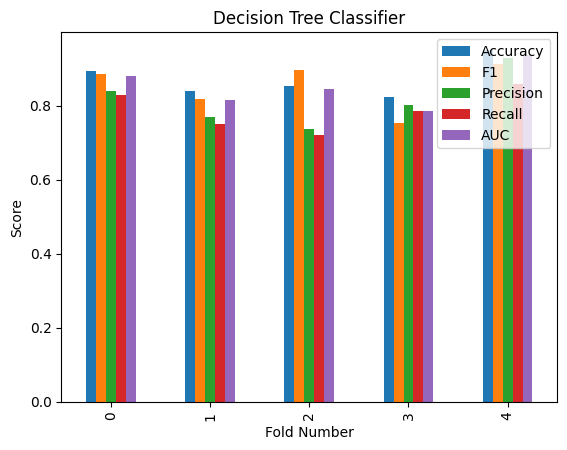

   Accuracy        F1  Precision    Recall       AUC
0  0.882353  0.827586   0.827586  0.827586  0.951970
1  0.894118  0.836364   0.884615  0.793103  0.943350
2  0.823529  0.693878   0.809524  0.607143  0.852130
3  0.929412  0.892857   0.892857  0.892857  0.987469
4  0.823529  0.745763   0.709677  0.785714  0.881579
5  0.882353  0.827586   0.800000  0.857143  0.958647
6  0.785714  0.709677   0.647059  0.785714  0.838648
7  0.857143  0.777778   0.807692  0.750000  0.871811
8  0.916667  0.877193   0.862069  0.892857  0.937500
9  0.845238  0.754717   0.800000  0.714286  0.940051


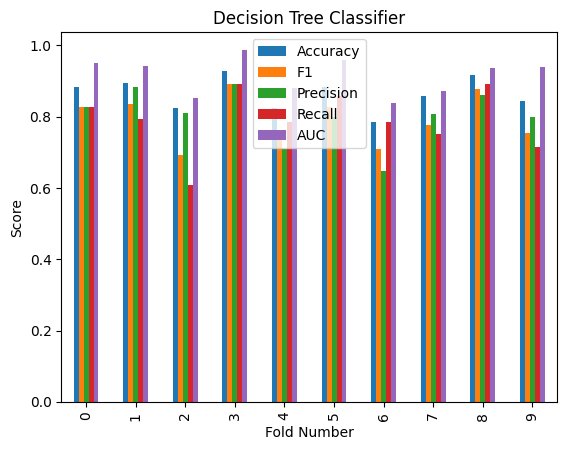

<AxesSubplot: title={'center': 'Decision Tree Classifier'}>

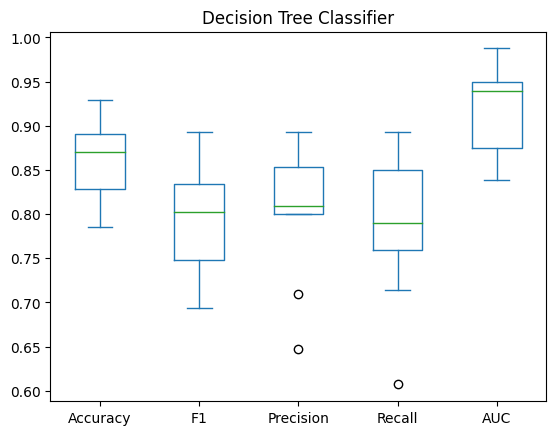

In [58]:
scores, scores_10 = evaluate_model( LogisticRegression(solver='lbfgs'), X_train, y_train, X_test, y_test)

score_pd = pd.DataFrame(scores, columns=['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'])
score_pd.plot(kind='bar', title='Decision Tree Classifier')

plt.title('Decision Tree Classifier')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

score_10_pd = pd.DataFrame(scores_10.T, columns=['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'])
print(score_10_pd)
score_10_pd.plot(kind='bar', title='Decision Tree Classifier')

plt.title('Decision Tree Classifier')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


score_10_pd.plot(kind='box', title='Decision Tree Classifier')

## 3. Evaluation

NameError: name 'y_test' is not defined